In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
nba_data = pd.read_csv('nba_2022-23_all_stats_with_salary.csv')

nba_data['GSPERCENT'] = nba_data['GS'] / nba_data['GP']

pg_data = nba_data[nba_data['Position'] == 'PG']
sg_data = nba_data[nba_data['Position'] == 'SG']
sf_data = nba_data[nba_data['Position'] == 'SF']
pf_data = nba_data[nba_data['Position'] == 'PF']
c_data = nba_data[nba_data['Position'] == 'C']

pg_feat = pg_data[['Age', 'PTS', 'AST', 'FG', 'Total Minutes', 'GSPERCENT']]
pg_salary = pg_data['Salary']

sg_feat = sg_data[['Age', 'PTS', 'AST', 'FG', 'Total Minutes', 'GSPERCENT']]
sg_salary = sg_data['Salary']

sf_feat = sf_data[['Age', 'PTS', 'AST', 'TRB', 'Total Minutes', 'GSPERCENT']]
sf_salary = sf_data['Salary']

pf_feat = pf_data[['Age', 'PTS', 'TRB', 'BLK', 'Total Minutes', 'GSPERCENT']]
pf_salary = pf_data['Salary']

c_feat = c_data[['Age', 'PTS', 'TRB', 'BLK', 'Total Minutes', 'GSPERCENT']]
c_salary = c_data['Salary']

In [3]:
#ALL RANDOM FOREST

# PG Model
pg_model = RandomForestRegressor(n_estimators=100, random_state=42)
pg_feat_train, pg_feat_test, pg_predict_train, pg_predict_test = train_test_split(pg_feat, pg_salary, test_size=0.2, random_state=42)
pg_model.fit(pg_feat_train, pg_predict_train)

# SG Model
sg_model = RandomForestRegressor(n_estimators=100, random_state=42)
sg_feat_train, sg_feat_test, sg_predict_train, sg_predict_test = train_test_split(sg_feat, sg_salary, test_size=0.2, random_state=42)
sg_model.fit(sg_feat_train, sg_predict_train)

# SF Model
sf_model = RandomForestRegressor(n_estimators=100, random_state=42)
sf_feat_train, sf_feat_test, sf_predict_train, sf_predict_test = train_test_split(sf_feat, sf_salary, test_size=0.2, random_state=42)
sf_model.fit(sf_feat_train, sf_predict_train)

# PF Model
pf_model = RandomForestRegressor(n_estimators=100, random_state=42)
pf_feat_train, pf_feat_test, pf_predict_train, pf_predict_test = train_test_split(pf_feat, pf_salary, test_size=0.2, random_state=42)
pf_model.fit(pf_feat_train, pf_predict_train)

# C Model
c_model = RandomForestRegressor(n_estimators=100, random_state=42)
c_feat_train, c_feat_test, c_predict_train, c_predict_test = train_test_split(c_feat, c_salary, test_size=0.2, random_state=42)
c_model.fit(c_feat_train, c_predict_train)

predicted_pg_salaries = pg_model.predict(pg_feat_test)
predicted_sg_salaries = sg_model.predict(sg_feat_test)
predicted_sf_salaries = sf_model.predict(sf_feat_test)
predicted_pf_salaries = pf_model.predict(pf_feat_test)
predicted_c_salaries = c_model.predict(c_feat_test)



R-squared:  0.5883196981052652

R-squared:  0.687067544096548

R-squared:  0.8101208296622237

R-squared:  0.8311477488542468

R-squared:  0.6237399553815851


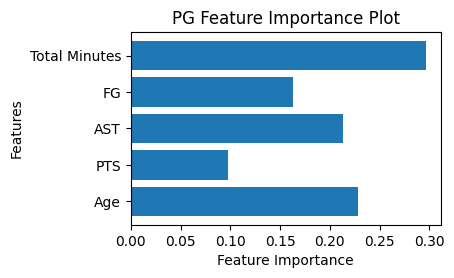

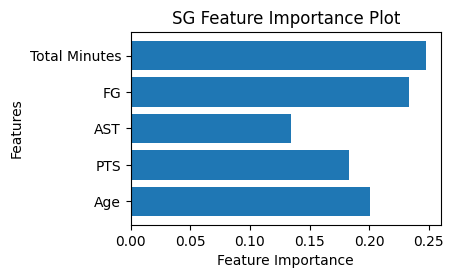

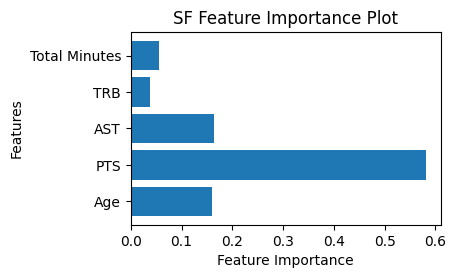

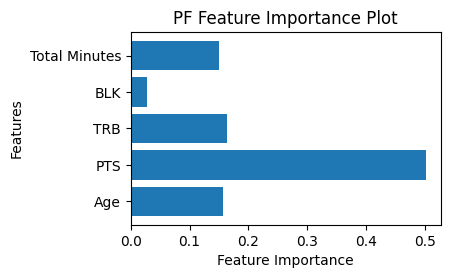

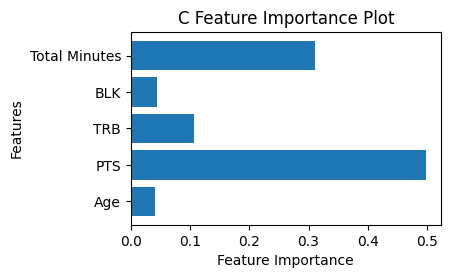

In [4]:
# Evaluate model performance
pg_r_squared = r2_score(pg_predict_test, predicted_pg_salaries)
sg_r_squared = r2_score(sg_predict_test, predicted_sg_salaries)
sf_r_squared = r2_score(sf_predict_test, predicted_sf_salaries)
pf_r_squared = r2_score(pf_predict_test, predicted_pf_salaries)
c_r_squared = r2_score(c_predict_test, predicted_c_salaries)

print("\nR-squared: ", pg_r_squared)
print("\nR-squared: ", sg_r_squared)
print("\nR-squared: ", sf_r_squared)
print("\nR-squared: ", pf_r_squared)
print("\nR-squared: ", c_r_squared)

feature_importances = pg_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(4, 2.5))
plt.barh(pg_feat.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('PG Feature Importance Plot')
plt.show()

feature_importances = sg_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(4, 2.5))
plt.barh(sg_feat.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('SG Feature Importance Plot')
plt.show()

feature_importances = sf_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(4, 2.5))
plt.barh(sf_feat.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('SF Feature Importance Plot')
plt.show()

feature_importances = pf_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(4, 2.5))
plt.barh(pf_feat.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('PF Feature Importance Plot')
plt.show()

feature_importances = c_model.feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(4, 2.5))
plt.barh(c_feat.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('C Feature Importance Plot')
plt.show()

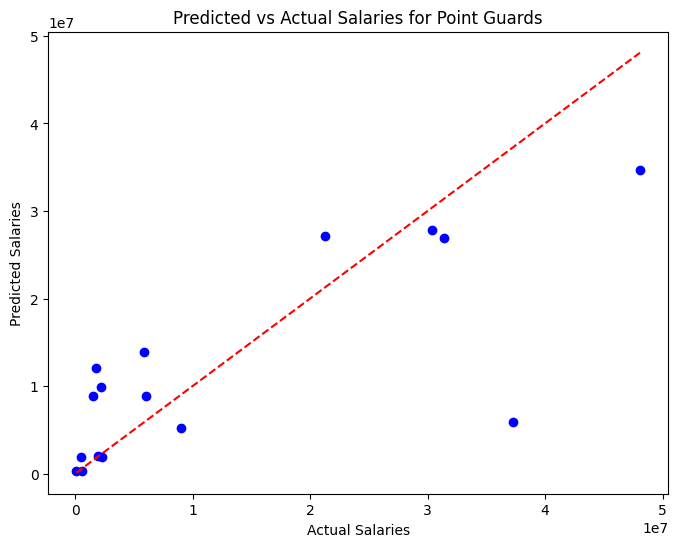

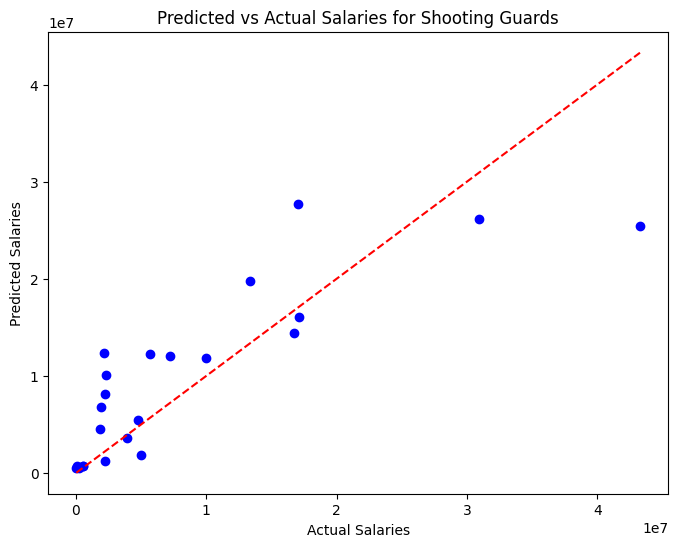

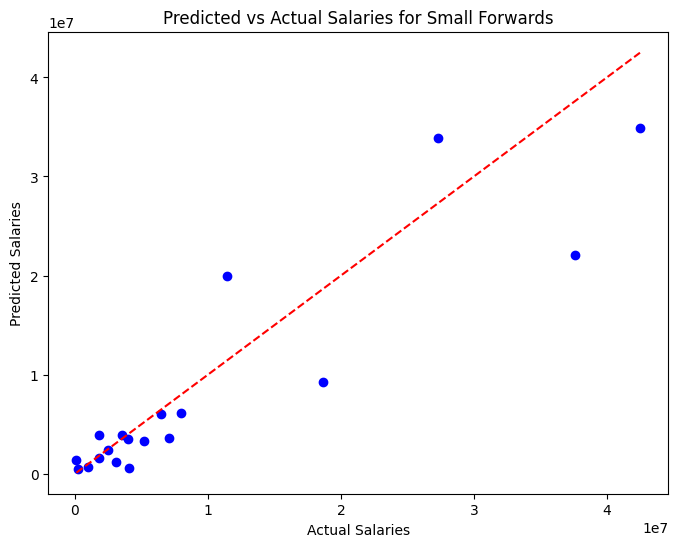

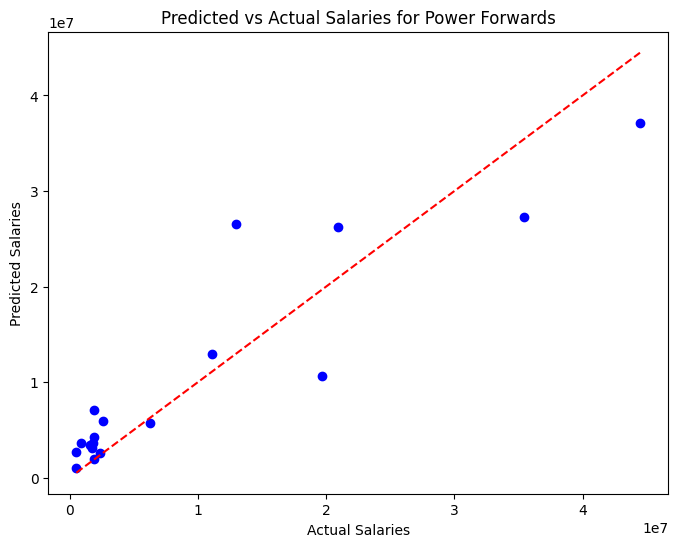

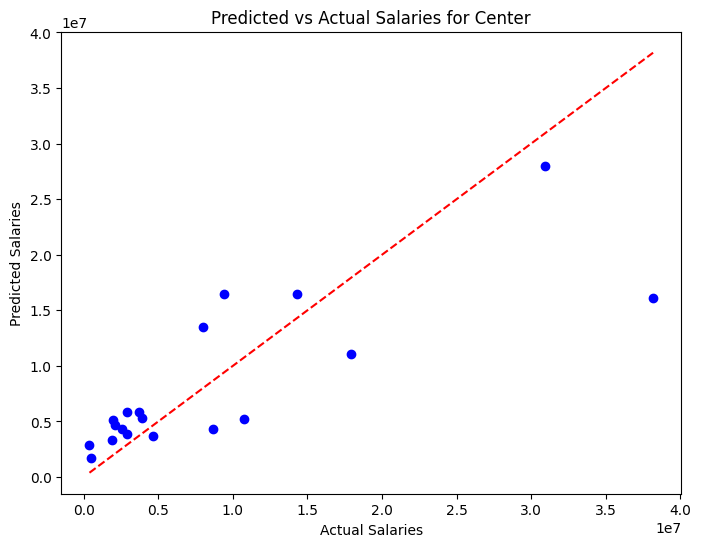

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(pg_predict_test, predicted_pg_salaries, color='blue')
plt.plot([min(pg_predict_test), max(pg_predict_test)], [min(pg_predict_test), max(pg_predict_test)], color='red', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Predicted vs Actual Salaries for Point Guards')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(sg_predict_test, predicted_sg_salaries, color='blue')
plt.plot([min(sg_predict_test), max(sg_predict_test)], [min(sg_predict_test), max(sg_predict_test)], color='red', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Predicted vs Actual Salaries for Shooting Guards')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(sf_predict_test, predicted_sf_salaries, color='blue')
plt.plot([min(sf_predict_test), max(sf_predict_test)], [min(sf_predict_test), max(sf_predict_test)], color='red', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Predicted vs Actual Salaries for Small Forwards')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(pf_predict_test, predicted_pf_salaries, color='blue')
plt.plot([min(pf_predict_test), max(pf_predict_test)], [min(pf_predict_test), max(pf_predict_test)], color='red', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Predicted vs Actual Salaries for Power Forwards')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(c_predict_test, predicted_c_salaries, color='blue')
plt.plot([min(c_predict_test), max(c_predict_test)], [min(c_predict_test), max(c_predict_test)], color='red', linestyle='--')
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Predicted vs Actual Salaries for Center')
plt.show()

# Predict salaries on test set